In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/u/1/d/1j_wMnaZR4M8e7FN4-NeX4aSxc49qg6tuQvRwv3XDOWs/export?format=csv&id=1j_wMnaZR4M8e7FN4-NeX4aSxc49qg6tuQvRwv3XDOWs&gid=549597888')
data

,STOREID,FASHION,LEISURE,STRETCH,ORIGINAL,SALESTOT
0,1,182,1528,496,2203,4409
1,2,129,2247,296,1890,4562
2,3,107,1652,267,2342,4368
3,4,117,1744,419,2119,4399
4,5,110,1736,755,1781,4382
...,...,...,...,...,...,...
684,685,62,1526,871,1956,4415
685,686,57,1564,8,1769,3398
686,687,104,1963,274,2053,4394
687,688,51,2057,393,1901,4402


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   STOREID   689 non-null    int64
 1   FASHION   689 non-null    int64
 2   LEISURE   689 non-null    int64
 3   STRETCH   689 non-null    int64
 4   ORIGINAL  689 non-null    int64
 5   SALESTOT  689 non-null    int64
dtypes: int64(6)
memory usage: 32.4 KB


In [4]:
data['STOREID'].is_unique

True

In [5]:
data.set_index('STOREID')

,FASHION,LEISURE,STRETCH,ORIGINAL,SALESTOT
STOREID,,,,,
1,182,1528,496,2203,4409
2,129,2247,296,1890,4562
3,107,1652,267,2342,4368
4,117,1744,419,2119,4399
5,110,1736,755,1781,4382
...,...,...,...,...,...
685,62,1526,871,1956,4415
686,57,1564,8,1769,3398
687,104,1963,274,2053,4394


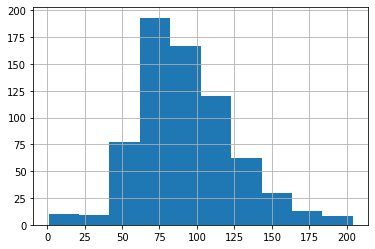

In [6]:
data['FASHION'].hist()

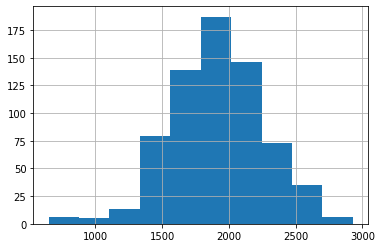

In [7]:
data['LEISURE'].hist()

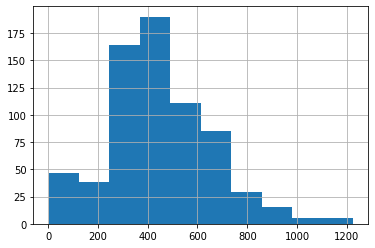

In [8]:
data['STRETCH'].hist()

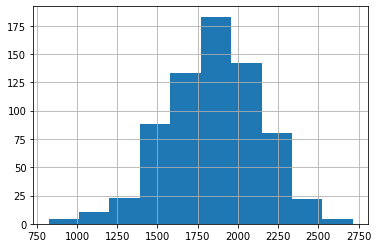

In [9]:
data['ORIGINAL'].hist()

In [10]:
data.query('FASHION + LEISURE + STRETCH + ORIGINAL != SALESTOT')

,STOREID,FASHION,LEISURE,STRETCH,ORIGINAL,SALESTOT


In [11]:
data.drop('SALESTOT', axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
scaled.head()

,STOREID,FASHION,LEISURE,STRETCH,ORIGINAL
0,-1.729539,2.753303,-1.107917,0.245628,1.213521
1,-1.724511,1.127167,0.942939,-0.699835,0.139382
2,-1.719483,0.452167,-0.754223,-0.836927,1.690534
3,-1.714456,0.758985,-0.491805,-0.118375,0.925253
4,-1.709428,0.544212,-0.514624,1.470004,-0.234679


In [13]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps=0.8, min_samples=5)
clustering_result = clusterer.fit_predict(scaled)

clustered_series = pd.DataFrame(clustering_result, index=scaled.index, columns = ['clustering_result'])
clustered = pd.concat([scaled, clustered_series], axis=1)
clustered.head()

,STOREID,FASHION,LEISURE,STRETCH,ORIGINAL,clustering_result
0,-1.729539,2.753303,-1.107917,0.245628,1.213521,-1
1,-1.724511,1.127167,0.942939,-0.699835,0.139382,0
2,-1.719483,0.452167,-0.754223,-0.836927,1.690534,0
3,-1.714456,0.758985,-0.491805,-0.118375,0.925253,0
4,-1.709428,0.544212,-0.514624,1.470004,-0.234679,-1


In [14]:
clustered['clustering_result'].value_counts()

 0    499
-1    169
 2     15
 1      6
Name: clustering_result, dtype: int64

In [15]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=6)
clustering_result = clusterer.fit_predict(scaled)

clustered_series = pd.DataFrame(clustering_result, index=scaled.index, columns = ['clustering_result'])
clustered = pd.concat([scaled, clustered_series], axis=1)
clustered.head()

,STOREID,FASHION,LEISURE,STRETCH,ORIGINAL,clustering_result
0,-1.729539,2.753303,-1.107917,0.245628,1.213521,2
1,-1.724511,1.127167,0.942939,-0.699835,0.139382,0
2,-1.719483,0.452167,-0.754223,-0.836927,1.690534,5
3,-1.714456,0.758985,-0.491805,-0.118375,0.925253,5
4,-1.709428,0.544212,-0.514624,1.470004,-0.234679,4


In [16]:
value_counts = clustered['clustering_result'].value_counts().sort_index()
value_counts

0    141
1     51
2     96
3    142
4    116
5    143
Name: clustering_result, dtype: int64

<BarContainer object of 6 artists>

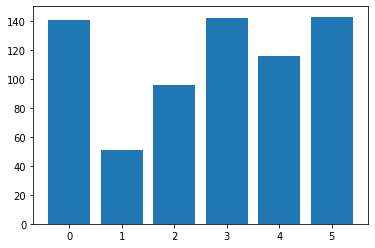

In [17]:
import matplotlib.pyplot as plt

plt.bar(value_counts.index, value_counts.values)